# Тема “Обучение с учителем”

#### Задание 1

Импортируйте библиотеки pandas и numpy.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и y из этих данных.
* Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.
* Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.
* Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.
* Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.


In [1]:
import numpy as np
import pandas as pd

In [2]:
# Импортируем датасет с бибилотеки sklearn.datasets
from sklearn.datasets import load_boston
# Ипортируем метод для разбивки на тренировочный и тестовый датасеты
from sklearn.model_selection import train_test_split
# Импортируем модель линейной регрессии
from sklearn.linear_model import LinearRegression

In [3]:
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib Inline

In [4]:
data = load_boston()

In [5]:
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [6]:
X = pd.DataFrame(data['data'], columns=data['feature_names'])

In [7]:
y = pd.DataFrame(data['target'], columns=['price'])

In [8]:
# Разобъём выборки и целевую переменную на тренировочные и тестовые с долей 30% на тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
lr = LinearRegression()

In [10]:
# Обучим модель на тренировочных данных
lr.fit(X_train, y_train)

LinearRegression()

In [11]:
# Произведём предсказание на тестовых
y_pred = lr.predict(X_test)

In [12]:
# Импортируем метрику r2_score
from sklearn.metrics import r2_score

In [13]:
arr = np.arange(0, 152)

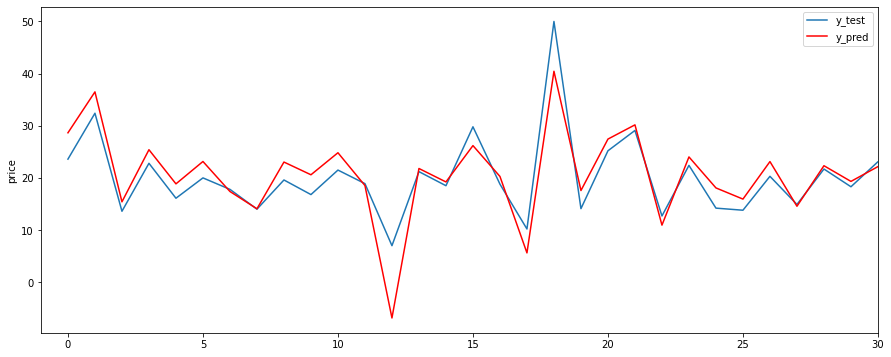

In [14]:
# Построим графики по тестовым и предсказанным данным
rcParams['figure.figsize'] = 15, 6
plt.plot(arr, y_test)
plt.plot(arr, y_pred, color = 'red')
plt.xlim([-1, 30])
plt.ylabel('price')
plt.legend(['y_test', 'y_pred'])

plt.show()

In [15]:
# Оценим качества предсказание с помощью метрики r2_score
r2_score(y_pred, y_test)

0.6693702691495576

#### Задание 2

* Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble.
* Сделайте агрумент n_estimators равным 1000, max_depth должен быть равен 12 и random_state сделайте равным 42.
* Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression, но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0], чтобы получить из датафрейма одномерный массив Numpy,так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.
* Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания.
* Напишите в комментариях к коду, какая модель в данном случае работает лучше.


In [16]:
# Импортируем модель ансамбль деревьев решений
from sklearn.ensemble import RandomForestRegressor

In [17]:
regr = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)

In [18]:
y_train_arr = y_train.values[:, 0]

In [19]:
regr.fit(X_train, y_train_arr)

RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)

In [20]:
y_pred = regr.predict(X_test)

In [21]:
check_test = pd.DataFrame({'y_test': y_test['price'],
                           'y_pred': y_pred.flatten()})

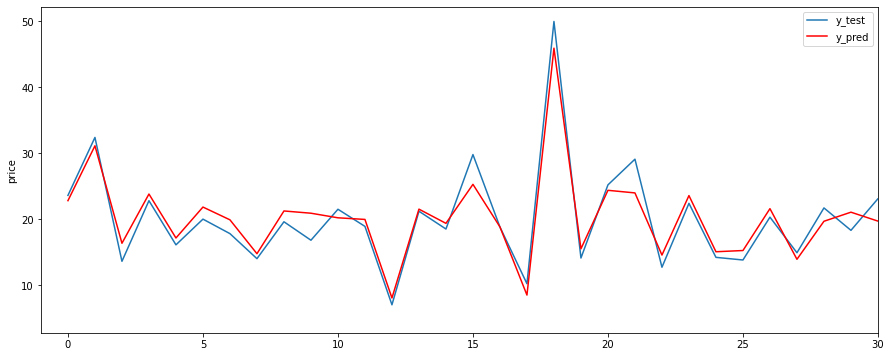

In [22]:
# Построим графики по тестовым и предсказанным данным
rcParams['figure.figsize'] = 15, 6
plt.plot(arr, y_test)
plt.plot(arr, y_pred, color = 'red')
plt.xlim([-1, 30])
plt.ylabel('price')
plt.legend(['y_test', 'y_pred'])

plt.show()

In [23]:
r2_score(y_pred, y_test)

0.8479049999699443

#### Вывод:
 * Судя по метрики R2 модель RandomForestRegressor работает намного точнее, чем модель LinearRegression

#### *Задание 3
* Вызовите документацию для класса RandomForestRegressor,
* найдите информацию об атрибуте feature_importances_.
* С помощью этого атрибута найдите сумму всех показателей важности,
* установите, какие два признака показывают наибольшую важность.


In [24]:
importance_arr = regr.feature_importances_
importance_arr

array([0.03167574, 0.00154252, 0.00713813, 0.00123624, 0.01426897,
       0.40268179, 0.01429864, 0.06397257, 0.00528122, 0.01152493,
       0.01808108, 0.01245085, 0.41584732])

In [25]:
importance_list = list(importance_arr)
print('Наиболее важные признаки:')
for value in range(2):
    idx = importance_list.index(max(importance_list))
    print(f'{data["feature_names"][idx]} - {importance_list[idx]}')
    importance_list[idx] = 0

Наиболее важные признаки:
LSTAT - 0.4158473181914483
RM - 0.4026817857034993


#### *Задание 4
* В этом задании мы будем работать с датасетом, с которым мы уже знакомы по домашнему заданию по библиотеке Matplotlib, это датасет Credit Card Fraud Detection. Для этого датасета мы будем решать задачу классификации - будем определять,какие из транзакциции по кредитной карте являются мошенническими.Данный датасет сильно несбалансирован (так как случаи мошенничества относительно редки), так что применение метрики accuracy не принесет пользы и не поможет выбрать лучшую модель. 
* Мы будем вычислять AUC, то есть площадь под кривой ROC.
* Импортируйте из соответствующих модулей RandomForestClassifier, GridSearchCV и train_test_split.
* Загрузите датасет creditcard.csv и создайте датафрейм df.
* С помощью метода value_counts с аргументом normalize=True убедитесь в том, что выборка несбалансирована. 
* Используя метод info, проверьте, все ли столбцы содержат числовые данные и нет ли в них пропусков.
*  Примените следующую настройку, чтобы можно было просматривать все столбцы датафрейма:
*  pd.options.display.max_columns = 100.
*  Просмотрите первые 10 строк датафрейма df.
*  Создайте датафрейм X из датафрейма df, исключив столбец Class.
*  Создайте объект Series под названием y из столбца Class.
*  Разбейте X и y на тренировочный и тестовый наборы данных при помощи функции train_test_split, используя аргументы: test_size=0.3, random_state=100, stratify=y.
*  У вас должны получиться объекты X_train, X_test, y_train и y_test.
*  Просмотрите информацию о их форме.
*  Для поиска по сетке параметров задайте такие параметры:
parameters = [{'n_estimators': [10, 15], 'max_features': np.arange(3, 5), 'max_depth': np.arange(4, 7)}]
*   Создайте модель GridSearchCV со следующими аргументами:
*   estimator=RandomForestClassifier(random_state=100),
*   param_grid=parameters,
*   scoring='roc_auc',
*   cv=3.
*   Обучите модель на тренировочном наборе данных (может занять несколько минут).
*   Просмотрите параметры лучшей модели с помощью атрибута best_params_.
*   Предскажите вероятности классов с помощью полученнной модели и метода predict_proba.
*   Из полученного результата (массив Numpy) выберите столбец с индексом 1 (вероятность класса 1) и запишите в      
*   массив y_pred_proba. Из модуля sklearn.metrics импортируйте метрику roc_auc_score.
*   Вычислите AUC на тестовых данных и сравните с результатом,полученным на тренировочных данных, используя в качестве аргументов массивы y_test и y_pred_proba.


In [26]:
# Импортируем модель ансамбль деревьев решений
from sklearn.ensemble import RandomForestClassifier
# Инструмент подбора параметров машинного обучения
from sklearn.model_selection import GridSearchCV

In [27]:
df = pd.read_csv('creditcard.csv')

In [28]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [29]:
df['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [31]:
# Для просмотра всех столбцов
pd.options.display.max_columns = 100

In [32]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [33]:
X = df.copy()
X.drop('Class', axis=1, inplace=True)

In [34]:
y = df['Class']

In [35]:
# Разобъём на train, test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [36]:
# Параметры:
# n_estimstors - количество деревьев
# max_features - максимальное количество признаков
# max_depth - максимальное глубина дерева
parametrs = [{'n_estimators': [10, 15],
              'max_features': np.arange(3, 5),
              'max_depth': np.arange(4, 7)}]

In [37]:
# Создадим модель
clf = GridSearchCV(estimator=RandomForestClassifier(random_state=100),
                   param_grid=parametrs,
                   scoring='roc_auc',
                   cv=3)

In [38]:
# Обучим
clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=100),
             param_grid=[{'max_depth': array([4, 5, 6]),
                          'max_features': array([3, 4]),
                          'n_estimators': [10, 15]}],
             scoring='roc_auc')

In [39]:
# Параметры лучшей модели
clf.best_params_

{'max_depth': 6, 'max_features': 3, 'n_estimators': 15}

In [40]:
# Предскажем вероятности классов
y_pred_proba = clf.predict_proba(X_test)

In [41]:
y_pred_proba

array([[9.99070828e-01, 9.29171738e-04],
       [9.99704794e-01, 2.95206364e-04],
       [9.99717846e-01, 2.82154033e-04],
       ...,
       [9.99717846e-01, 2.82154033e-04],
       [9.99317795e-01, 6.82204754e-04],
       [9.87539019e-01, 1.24609813e-02]])

In [42]:
# Возьмём столбец с индексом 1 (вероятность класса 1)
y_pred_proba = y_pred_proba[:, 1]

In [43]:
y_pred_proba

array([0.00092917, 0.00029521, 0.00028215, ..., 0.00028215, 0.0006822 ,
       0.01246098])

In [44]:
# Импортируем метрику roc_auc_score
from sklearn.metrics import roc_auc_score

In [45]:
roc_auc_score(y_test, y_pred_proba)

0.9462664156037156

### *Дополнительные задания:
* 1). Загрузите датасет Wine из встроенных датасетов sklearn.datasets с помощью функции load_wine в переменную data.
* 2). Полученный датасет не является датафреймом. Это структура данных, имеющая ключи аналогично словарю. Просмотрите тип данных этой структуры данных и создайте список data_keys, содержащий ее ключи.
* 3). Просмотрите данные, описание и названия признаков в датасете. Описание нужно вывести в виде привычного, аккуратно оформленного текста, без обозначений переноса строки, но с самими переносами и т.д.
* 4). Сколько классов содержит целевая переменная датасета? Выве
дите названия классов.
* 5). На основе данных датасета (они содержатся в двумерном массиве Numpy) и названий признаков создайте датафрейм под названием X.
* 6). Выясните размер датафрейма X и установите, имеются ли в нем пропущенные значения.
* 7). Добавьте в датафрейм поле с классами вин в виде чисел, имеющих тип данных numpy.int64. Название поля - 'target'.
* 8). Постройте матрицу корреляций для всех полей X. Дайте полученному датафрейму название X_corr.
* 9). Создайте список high_corr из признаков, корреляция которых с полем target по абсолютному значению превышает 0.5 (причем, само поле target не должно входить в этот список).
* 10). Удалите из датафрейма X поле с целевой переменной. Для всех признаков, названия которых содержатся в списке high_corr, вычислите квадрат их значений и добавьте в датафрейм X соответствующие поля с суффиксом '_2', добавленного к первоначальному названию признака. Итоговый датафрейм должен содержать все поля, которые, были в нем изначально, а также поля с признаками из списка high_corr, возведенными в квадрат. Выведите описание полей датафрейма X с помощью метода describe.


In [46]:
# Загрузим датасет из библиотеки
from sklearn.datasets import load_wine

In [47]:
wine = load_wine()

In [48]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [49]:
print(wine['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [50]:
wine['target_names']

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [51]:
X = pd.DataFrame(wine['data'], columns=wine['feature_names'])
X.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0


In [52]:
X.shape

(178, 13)

In [53]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [54]:
wine['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [55]:
X['target'] = wine['target']

In [56]:
X.tail(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
168,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.660000,0.74,1.80,750.0,2
169,13.40,4.60,2.86,25.0,112.0,1.98,0.96,0.27,1.11,8.500000,0.67,1.92,630.0,2
170,12.20,3.03,2.32,19.0,96.0,1.25,0.49,0.40,0.73,5.500000,0.66,1.83,510.0,2
171,12.77,2.39,2.28,19.5,86.0,1.39,0.51,0.48,0.64,9.899999,0.57,1.63,470.0,2
172,14.16,2.51,2.48,20.0,91.0,1.68,0.70,0.44,1.24,9.700000,0.62,1.71,660.0,2
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.700000,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.300000,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.200000,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.300000,0.60,1.62,840.0,2
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.200000,0.61,1.60,560.0,2


In [57]:
import seaborn as sns

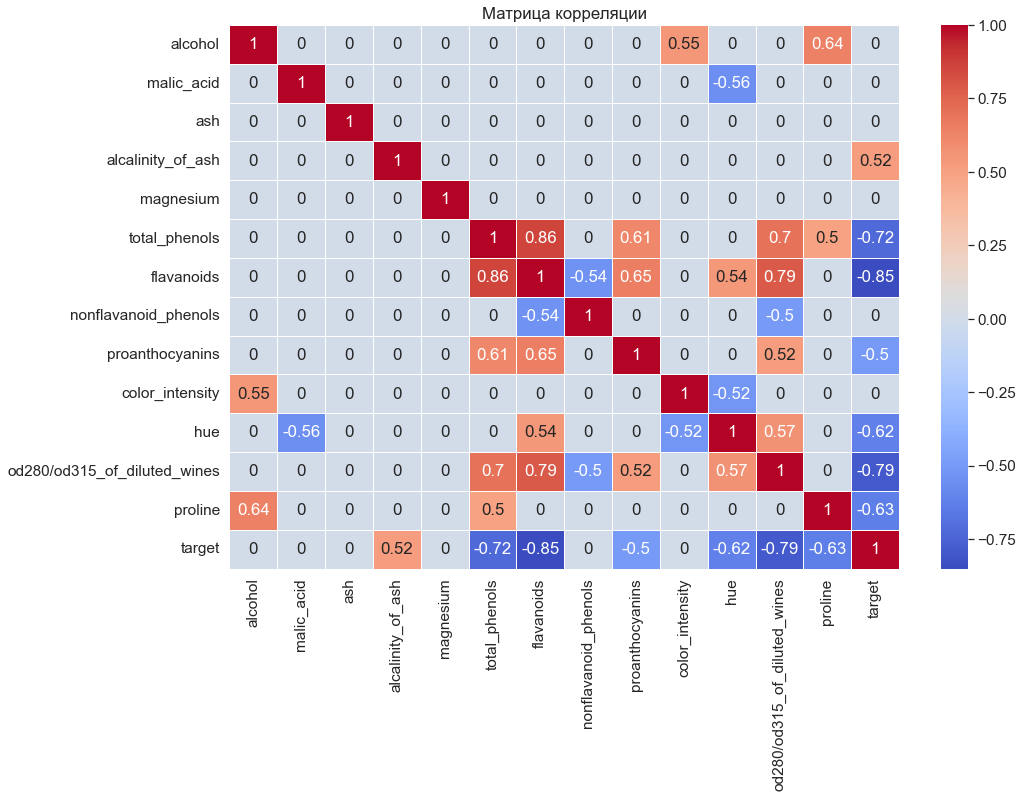

In [58]:
# Построим матрицу корреляции
plt.figure(figsize=(15, 10))
sns.set(font_scale=1.4)

X_corr = X.corr()
X_corr = np.round(X_corr, 2)
X_corr[np.abs(X_corr) < 0.5] = 0

sns.heatmap(X_corr, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Матрица корреляции')
plt.show()

In [63]:
# Создадим список из признаков кореляция, которых с полем таргет > 0.5
high_corr = []

conditions = (np.abs(X_corr[feature]) > 0.5) & (X_corr[feature] != 1)
# conditions_0 = (abs(X_corr[feature].values) > 0.5) & (X_corr[feature].values != 1)
for feature in X_corr.columns:
    if feature != 'target':
        if np.abs(X_corr[feature][conditions]).max() > 0.5:
            high_corr.append(feature)
high_corr

['alcohol',
 'malic_acid',
 'alcalinity_of_ash',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [69]:
# Удалим из датафрейма X поле с целевой переменной
X.drop('target', axis=1, inplace=True)

In [70]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [145]:
X_feature_square = X.copy()

In [146]:
high_corr

['alcohol',
 'malic_acid',
 'alcalinity_of_ash',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [147]:
# Для всех признаков списка high_corr вычислим их квадраты 
# и запишем рядом в новый столбец с суффиксом _2
for col in high_corr:
    new_col = col + '_2'
    # Получим индекс по имени столбца для вставки
    idx_insert = X_feature_square.columns.get_loc(col) + 1
    X_feature_square.insert(idx_insert, new_col, X_feature_square[col] ** 2)

In [148]:
X_feature_square.head(5)

,alcohol,alcohol_2,malic_acid,malic_acid_2,ash,alcalinity_of_ash,alcalinity_of_ash_2,magnesium,total_phenols,total_phenols_2,flavanoids,flavanoids_2,nonflavanoid_phenols,nonflavanoid_phenols_2,proanthocyanins,proanthocyanins_2,color_intensity,color_intensity_2,hue,hue_2,od280/od315_of_diluted_wines,od280/od315_of_diluted_wines_2,proline,proline_2
0,14.23,202.4929,1.71,2.9241,2.43,15.6,243.36,127.0,2.80,7.8400,3.06,9.3636,0.28,0.0784,2.29,5.2441,5.64,31.8096,1.04,1.0816,3.92,15.3664,1065.0,1134225.0
1,13.20,174.2400,1.78,3.1684,2.14,11.2,125.44,100.0,2.65,7.0225,2.76,7.6176,0.26,0.0676,1.28,1.6384,4.38,19.1844,1.05,1.1025,3.40,11.5600,1050.0,1102500.0
2,13.16,173.1856,2.36,5.5696,2.67,18.6,345.96,101.0,2.80,7.8400,3.24,10.4976,0.30,0.0900,2.81,7.8961,5.68,32.2624,1.03,1.0609,3.17,10.0489,1185.0,1404225.0
3,14.37,206.4969,1.95,3.8025,2.50,16.8,282.24,113.0,3.85,14.8225,3.49,12.1801,0.24,0.0576,2.18,4.7524,7.80,60.8400,0.86,0.7396,3.45,11.9025,1480.0,2190400.0
4,13.24,175.2976,2.59,6.7081,2.87,21.0,441.00,118.0,2.80,7.8400,2.69,7.2361,0.39,0.1521,1.82,3.3124,4.32,18.6624,1.04,1.0816,2.93,8.5849,735.0,540225.0


In [149]:
X_feature_square.describe()

,alcohol,alcohol_2,malic_acid,malic_acid_2,ash,alcalinity_of_ash,alcalinity_of_ash_2,magnesium,total_phenols,total_phenols_2,flavanoids,flavanoids_2,nonflavanoid_phenols,nonflavanoid_phenols_2,proanthocyanins,proanthocyanins_2,color_intensity,color_intensity_2,hue,hue_2,od280/od315_of_diluted_wines,od280/od315_of_diluted_wines_2,proline,proline_2
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,1.780000e+02
mean,13.000618,169.671428,2.336348,6.699528,2.366517,19.494944,391.142865,99.741573,2.295112,5.657030,2.029270,5.110049,0.361854,0.146340,1.590899,2.856713,5.058090,30.928529,0.957449,0.968661,2.611685,7.322155,746.893258,6.564591e+05
std,0.811827,21.086573,1.117146,6.643747,0.274344,3.339564,133.671775,14.282484,0.625851,2.936294,0.998859,4.211441,0.124453,0.098364,0.572359,2.047930,2.318286,28.872785,0.228572,0.443798,0.709990,3.584316,314.907474,5.558591e+05
min,11.030000,121.660900,0.740000,0.547600,1.360000,10.600000,112.360000,70.000000,0.980000,0.960400,0.340000,0.115600,0.130000,0.016900,0.410000,0.168100,1.280000,1.638400,0.480000,0.230400,1.270000,1.612900,278.000000,7.728400e+04
25%,12.362500,152.831425,1.602500,2.568025,2.210000,17.200000,295.840000,88.000000,1.742500,3.036325,1.205000,1.452100,0.270000,0.072900,1.250000,1.562500,3.220000,10.368700,0.782500,0.612325,1.937500,3.754075,500.500000,2.505010e+05
50%,13.050000,170.302500,1.865000,3.478250,2.360000,19.500000,380.250000,98.000000,2.355000,5.546050,2.135000,4.558250,0.340000,0.115600,1.555000,2.418050,4.690000,21.996200,0.965000,0.931250,2.780000,7.728400,673.500000,4.536045e+05
75%,13.677500,187.074025,3.082500,9.502725,2.557500,21.500000,462.250000,107.000000,2.800000,7.840000,2.875000,8.265700,0.437500,0.191425,1.950000,3.802500,6.200000,38.440000,1.120000,1.254400,3.170000,10.048900,985.000000,9.702250e+05
max,14.830000,219.928900,5.800000,33.640000,3.230000,30.000000,900.000000,162.000000,3.880000,15.054400,5.080000,25.806400,0.660000,0.435600,3.580000,12.816400,13.000000,169.000000,1.710000,2.924100,4.000000,16.000000,1680.000000,2.822400e+06
